In [84]:
import clean
import firePCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
wild_fires, ind_var = clean.clean()
pca_reduced = firePCA.firePCA()

ind_var_train = ind_var[:-96]
ind_var_test = ind_var[-96:]

pca_var_train = pca_reduced[:-96]
pca_var_test = pca_reduced[-96:]

wild_fires_train = wild_fires[:-96]
wild_fires_test = wild_fires[-96:]



In [86]:
linear_regression = LinearRegression()
linear_regression.fit(ind_var_train, wild_fires_train)
wild_fires_predict = linear_regression.predict(ind_var_test)
wild_fires_predict = np.where(wild_fires_predict < 0, 0, wild_fires_predict)

print('RMSE: %.2f' 
      % mean_squared_error(wild_fires_test, wild_fires_predict, squared=False))
print('R^2: %.2f'
      % r2_score(wild_fires_test, wild_fires_predict))

pca_linear_regression = LinearRegression()
pca_linear_regression.fit(pca_var_train, wild_fires_train)
pca_wild_fires_predict = pca_linear_regression.predict(pca_var_test)
pca_wild_fires_predict = np.where(pca_wild_fires_predict < 0, 0, pca_wild_fires_predict)

print('PCA RMSE: %.2f' 
      % mean_squared_error(wild_fires_test, pca_wild_fires_predict, squared=False))
print('PCA R^2: %.2f'
      % r2_score(wild_fires_test, pca_wild_fires_predict))

RMSE: 1412.77
R^2: 0.43
PCA RMSE: 1497.34
PCA R^2: 0.36


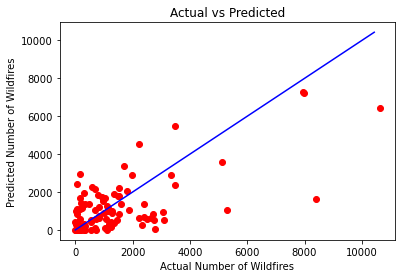

In [87]:
plt.plot(wild_fires_test, wild_fires_predict, 'o', color='red')
plt.xlabel("Actual Number of Wildfires")
plt.ylabel("Predicted Number of Wildfires")
plt.title("Actual vs Predicted")
x = np.linspace(0, 10431, 10431)
plt.plot(x, x, linestyle='solid', color='blue')

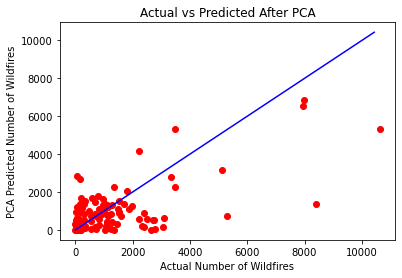

In [88]:
plt.plot(wild_fires_test, pca_wild_fires_predict, 'o', color='red')
plt.xlabel("Actual Number of Wildfires")
plt.ylabel("PCA Predicted Number of Wildfires")
plt.title("Actual vs Predicted After PCA")
x = np.linspace(0, 10431, 10431)
plt.plot(x, x, linestyle='solid', color='blue')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RMSE: 0.38
Coefficient of determination: 0.16


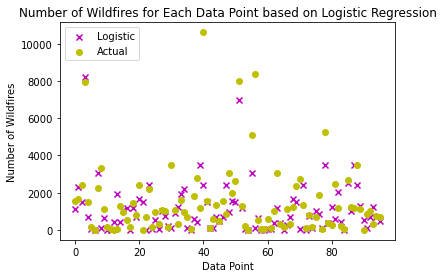

In [94]:
wild_fires, ind_var = clean.clean()
ind_1 = ind_var[:,:5]
ind_2 = ind_var[:,6:]
ind_var = np.concatenate((ind_1, ind_2), axis = 1)
ind_var_train = ind_var[:-96,:]
ind_var_test = ind_var[-96:,:]

wild_fires_train = wild_fires[:-96]
wild_fires_test = wild_fires[-96:]

logistic_regression = LogisticRegression()
wild_fires_train = wild_fires_train.flatten()
logistic_regression.fit(ind_var_train, wild_fires_train)
logistic_results = logistic_regression.predict(ind_var_test)
print('RMSE: %.2f' 
      % mean_squared_error(normalize(logistic_results.reshape(-1,1)), normalize(wild_fires_predict).reshape(-1,1), squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(logistic_results.reshape(-1,1),wild_fires_predict.reshape(-1,1)))




    
fig = plt.figure()
ax1 = fig.add_subplot(111)
x_list = np.array([i for i in range(96)])
ax1.scatter(x_list,logistic_results, c='m', marker="x", label='Logistic')
ax1.scatter(x_list,wild_fires_test, c='y', marker="o", label='Actual')

plt.xlabel("Data Point")
plt.ylabel("Number of Wildfires")
plt.title("Number of Wildfires for Each Data Point based on Logistic Regression")

plt.legend(loc='upper left');
plt.show()